In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv'
                )
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15','price']

In [4]:
df = data[features]

In [5]:
df = df[df['bedrooms'] <= 11]

In [6]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chuyển kiểu dữ liệu các cột sang float
cols_to_convert = ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
df[cols_to_convert] = df[cols_to_convert].astype(float)


# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()


df.loc[:, ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']] = scaler.fit_transform(df[['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']])

In [7]:
features1 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
X = df[features1]
y = df['price']

print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00    -0.979841 -0.228326     1.0           0     0   
1             3       2.25     0.533602 -0.189891     2.0           0     0   
2             2       1.00    -1.426252 -0.123306     1.0           0     0   
3             4       3.00    -0.130571 -0.244019     1.0           0     0   
4             3       2.00    -0.435437 -0.169660     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50    -0.598758 -0.337427     3.0           0     0   
21609         4       2.50     0.250512 -0.224391     2.0           0     0   
21610         2       0.75    -1.154050 -0.332140     2.0           0     0   
21611         3       2.50    -0.522542 -0.307080     2.0           0     0   
21612         2       0.75    -1.154050 -0.338755     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [8]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,train_size=0.88, random_state=0)

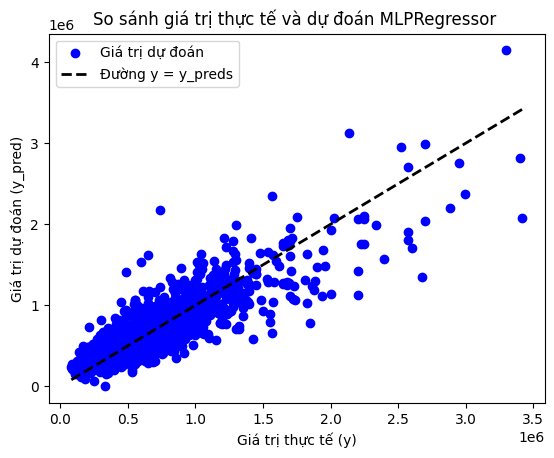

R-square: 0.77949413


In [9]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, random_state=42, learning_rate_init=0.01)
MLP.fit(X_train, y_train)
MLP_preds = MLP.predict(X_test)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_test, MLP_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường y = y_preds')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán MLPRegressor ")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {MLP.score(X_train, y_train):.8f}")

In [14]:

y_train_pred = MLP.predict(X_train) 
y_test_pred = MLP.predict(X_test)

# Đánh giá trên tập huấn luyện
mse_train = mean_squared_error(y_train, y_train_pred) 
mae_train = mean_absolute_error(y_train, y_train_pred) 
r2_train = r2_score (y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)

print("Đánh giá trên tập huấn luyện:") 
print(f"Mean Squared Error: {mse_train}")
print (f"Mean Absolute Error: {mae_train}")
print (f"R2 Score: {r2_train}")
print (f"Root Mean Squared Error (RMSE): {rmse_train}\n")

# Đánh giá trên tập xác thực
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred) 
r2_test = r2_score (y_test, y_test_pred) 
rmse_test = np.sqrt(mse_test)

print("Đánh giá trên tập xác thực:")
print (f"Mean Squared Error: {mse_test}")
print (f"Mean Absolute Error: {mae_test}")
print (f"R2 Score: {r2_test}")
print (f"Root Mean Squared Error (RMSE): {rmse_test}")


Đánh giá trên tập huấn luyện:
Mean Squared Error: 31108719243.678207
Mean Absolute Error: 118586.13486741263
R2 Score: 0.7794941267761969
Root Mean Squared Error (RMSE): 176376.640300461

Đánh giá trên tập xác thực:
Mean Squared Error: 27818747378.89306
Mean Absolute Error: 114913.3224273698
R2 Score: 0.7528733776187329
Root Mean Squared Error (RMSE): 166789.53018368108


In [17]:
import time

start_time = time.time()
MLP.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.2f} giây")
start_time = time.time()
y_pred = MLP.predict(X_test)
predict_time = time.time() - start_time
print(f"Thời gian dự đoán: {predict_time:.6f} giây")

Thời gian huấn luyện: 162.48 giây
Thời gian dự đoán: 0.024311 giây


In [19]:
X_test_noisy = X_test + np.random.normal(0, 0.01, X_test.shape)
y_pred_noisy = MLP.predict(X_test_noisy)
mse_noisy = mean_squared_error(y_test, y_pred_noisy) 
mae_noisy = mean_absolute_error(y_test, y_pred_noisy) 
r2_noisy = r2_score (y_test, y_pred_noisy)
print(f"MSE with noise: {mse_noisy}") 
print(f"MAE with noise: {mae_noisy}") 
print (f"R2 with noise: {r2_noisy}")

MSE with noise: 27808491105.866432
MAE with noise: 114839.0640373184
R2 with noise: 0.7529644887703879


In [20]:
sample_size = [5000, 10000, 15000, 20000]
for size in sample_size:
    X_sample = X_train[:size]
    y_sample = y_train[:size]

    start_time = time.time()
    MLP.fit(X_sample, y_sample)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện với mẫu {size}: {train_time:.4f} giây")

Thời gian huấn luyện với mẫu 5000: 40.9634 giây
Thời gian huấn luyện với mẫu 10000: 49.3153 giây
Thời gian huấn luyện với mẫu 15000: 88.2235 giây
Thời gian huấn luyện với mẫu 20000: 162.8803 giây


In [22]:
total_params = sum(np.prod(layer.shape) for layer in MLP.coefs_)
print(f"Số lượng tham số trong mô hình: {total_params}")

Số lượng tham số trong mô hình: 3040
